##Kidney Stone Prediction

 to determine which procedure is more effective for kidney stone removal.

In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#uploading the dataset into colab note
from google.colab import files
data=files.upload()

Saving Kidney stone analysis.csv to Kidney stone analysis (1).csv


In [ ]:
#creating a dataframe
import io
df = pd.read_csv(io.BytesIO(data['Kidney stone analysis.csv']))
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [ ]:
#to find any missing values are present in this dataset
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [ ]:
#to check how many rows and columns are present in this dateset
df.shape

(79, 7)

so,there is 79 rows and 7 columns are present in this dataset

In [ ]:
#finding the descriptive statistical parameters of the features
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


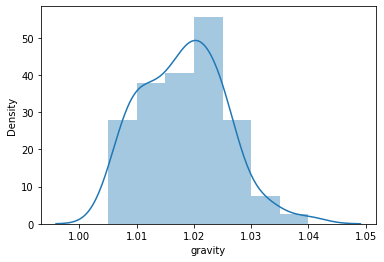

In [ ]:
#Identifying outliers in 'gravity' 
sns.distplot(df['gravity'], kde = True)

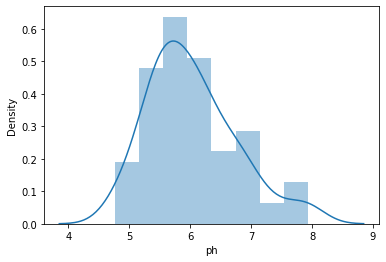

In [ ]:
#Identifying outliers in 'ph'
sns.distplot(df['ph'], kde = True)

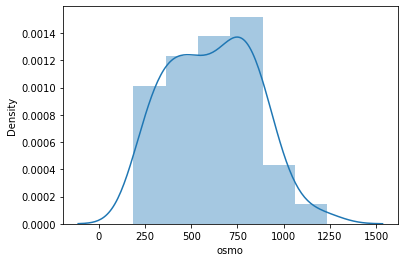

In [ ]:
#Identifying outliers in 'osmo'
sns.distplot(df['osmo'], kde = True)

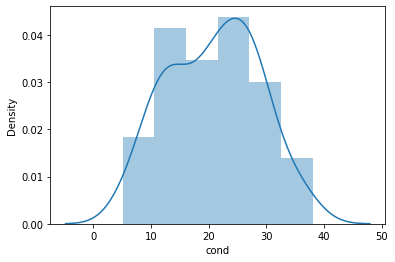

In [ ]:
#Identifying outliers in 'cond'
sns.distplot(df['cond'], kde = True)

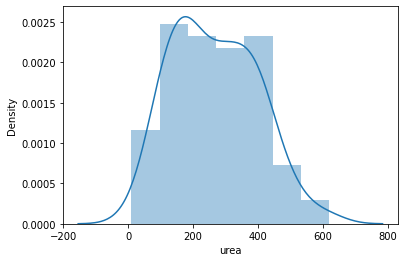

In [ ]:
#Identifying outliers in 'urea'
sns.distplot(df['urea'], kde = True)

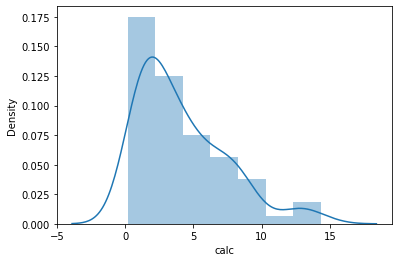

In [ ]:
#Identifying outliers in 'calc'
sns.distplot(df['calc'], kde = True)

In [ ]:
#cheecking the shape of the data
print('Shape: ', df.shape)
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Shape:  (79, 7)
Rows:  79
Columns:  7


In [ ]:
df['target'].value_counts()

0    45
1    34
Name: target, dtype: int64

In [ ]:
45/(79)

0.569620253164557

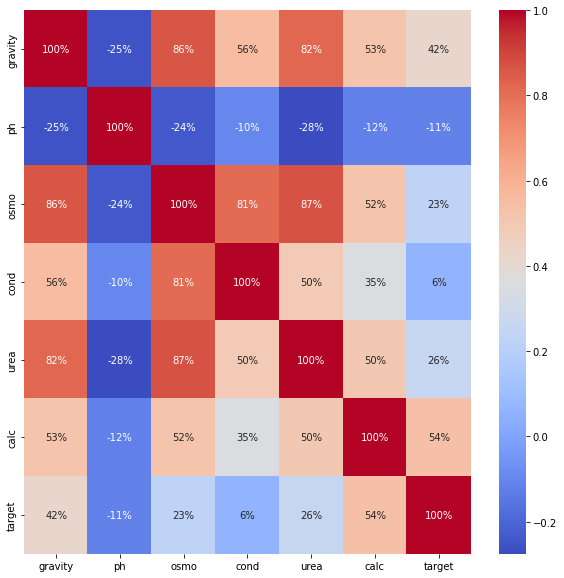

In [ ]:
#creating a heatmap to see the correlation between the various features
# heatmap is shows magnitude of a phenomenon as color in two dimensions
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

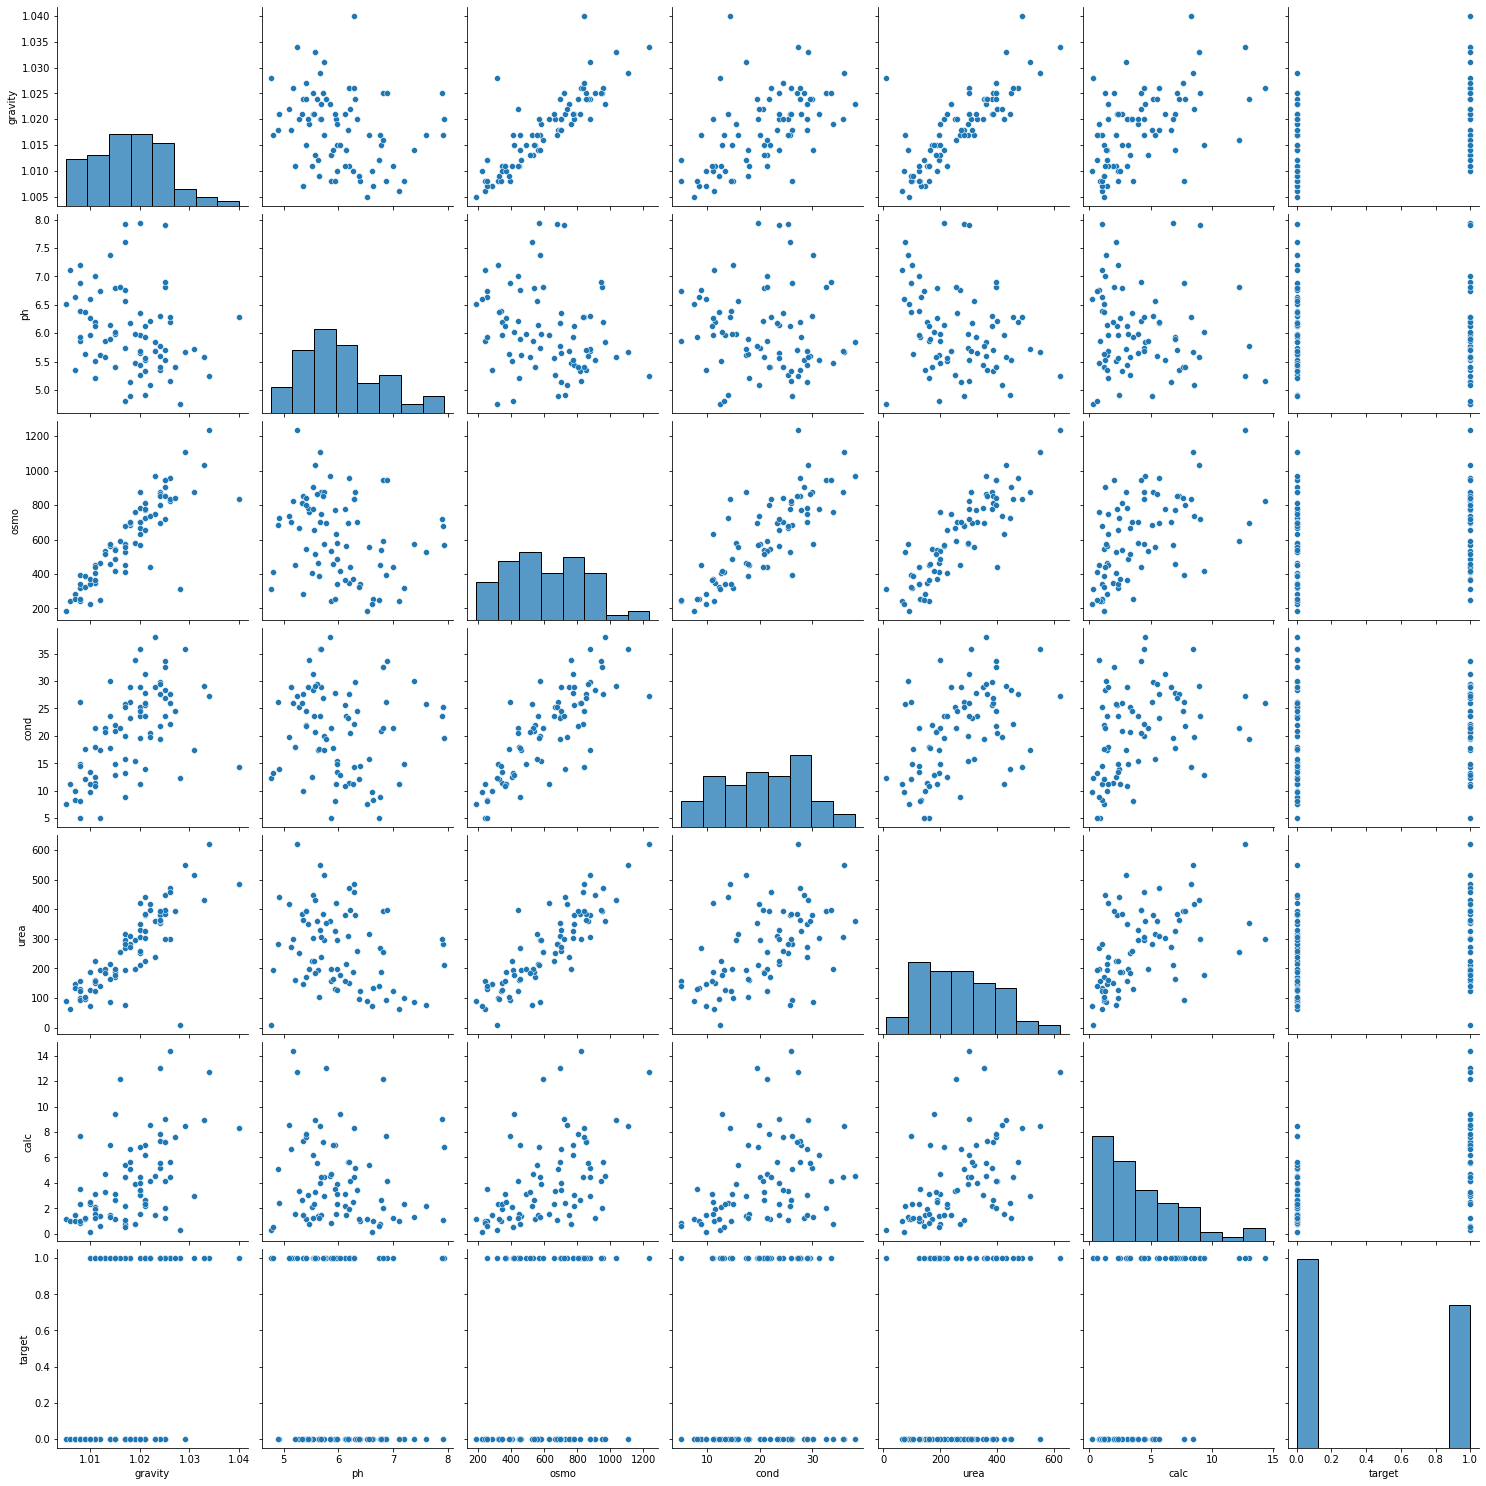

In [ ]:
# checking the bivariate relation between each pair of feature using pairplot
sns.pairplot(df,size=3)

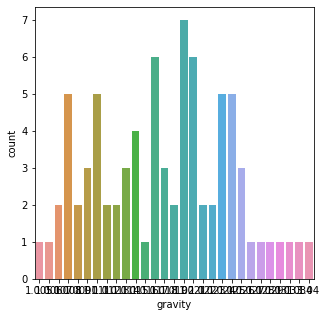

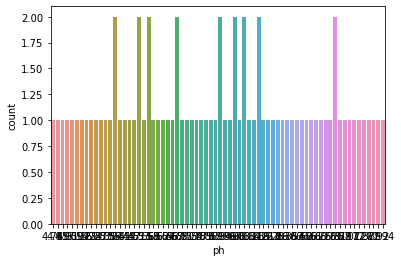

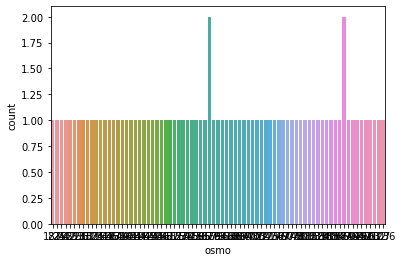

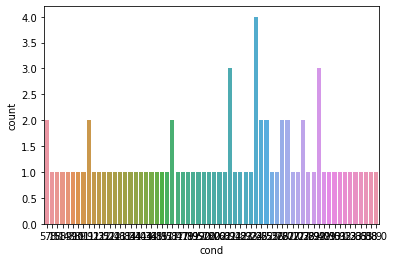

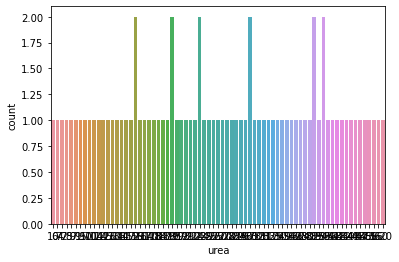

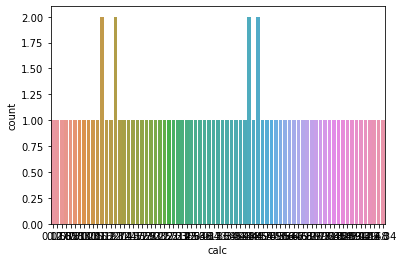

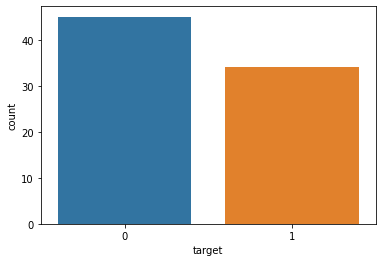

In [ ]:
#creating countplots to check the unique values of features with binary and repeatitive values

plt.figure(figsize=(5,5))

sns.countplot(df['gravity'])
plt.show()
sns.countplot(df['ph'])
plt.show()
sns.countplot(df['osmo'])
plt.show()
sns.countplot(df['cond'])
plt.show()
sns.countplot(df['urea'])
plt.show()
sns.countplot(df['calc'])
plt.show()
sns.countplot(df['target'])
plt.show()

In [ ]:
#identify the outlier in all the input features and if there are any outliers remove them

In [ ]:
#perfoming min max scaling
#importing requried library
from sklearn.preprocessing import MinMaxScaler


#intialization the model
model = MinMaxScaler()
df.iloc[:, :6] = model.fit_transform(df.iloc[:, :6])
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,0.457143,0.047170,0.512869,0.270517,0.709836,0.160903,0
1,0.342857,0.308176,0.371783,0.452888,0.468852,0.304869,0
2,0.085714,0.767296,0.127741,0.297872,0.149180,0.154552,0
3,0.171429,0.235849,0.210677,0.227964,0.350820,0.139732,0
4,0.000000,0.553459,0.000000,0.072948,0.132787,0.069866,0


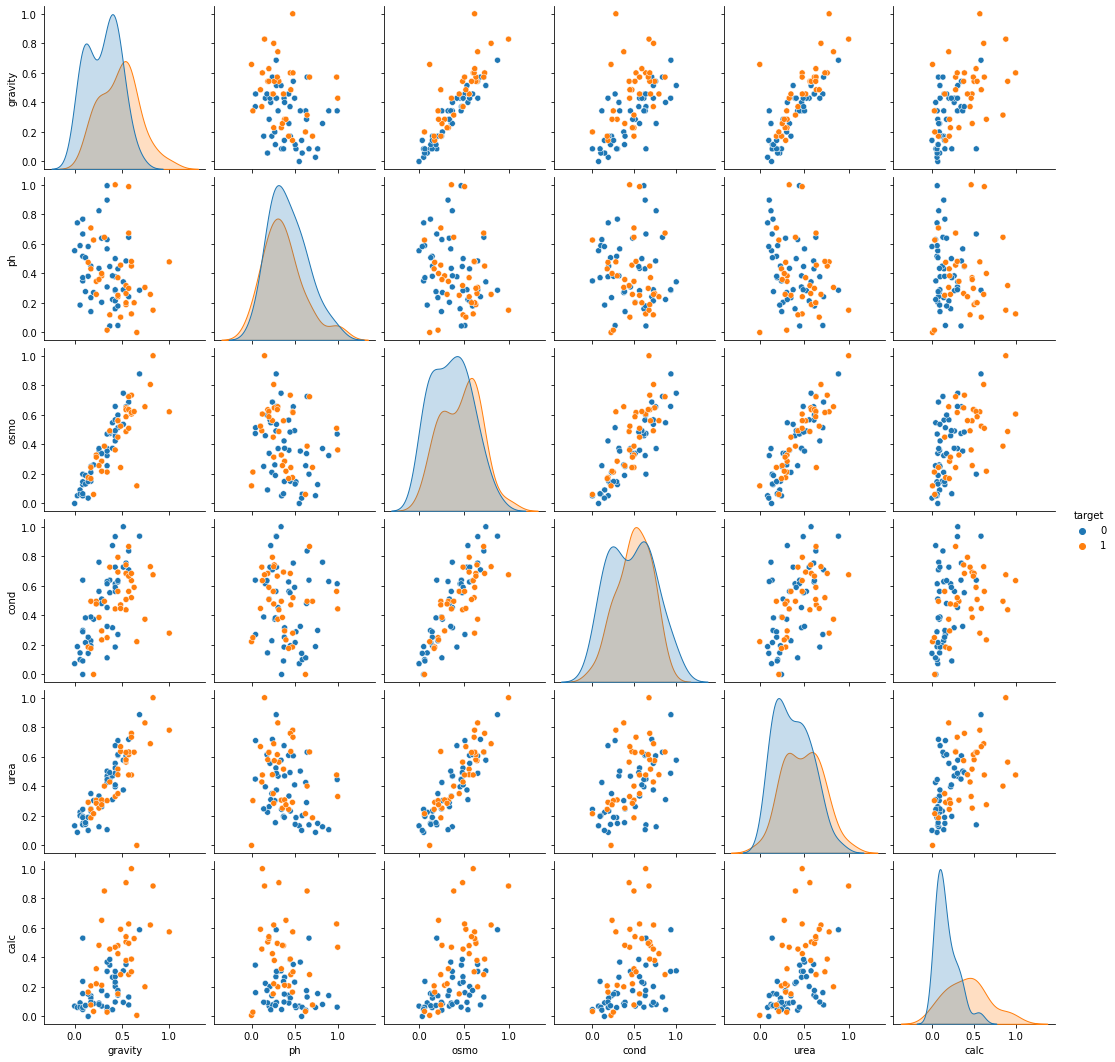

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='target')

In [ ]:
#people with kidneystone are having higher calcium concentration
#there is a stong positive correlation between osmo and cond
#there is a stong positive correlation between urea and calc
#there is a stong positive correlation between osmo and urea

In [ ]:
df=df[df['osmo']<3]

In [ ]:
#separating input feature input and output variables
x = df.iloc[:, :6]
y = df['target']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2,random_state = 7)

In [ ]:
#getting optimal value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []
for i in range(3, 50, 2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    train_acc = (accuracy_score(model.predict(x_train), y_train))
    test_acc = (accuracy_score(model.predict(x_test), y_test))
    acc.append([train_acc,test_acc])
    
    
print('Accuracy :\n', acc)    

Accuracy :
 [[0.8571428571428571, 1.0], [0.7301587301587301, 1.0], [0.7619047619047619, 1.0], [0.7301587301587301, 0.9375], [0.7301587301587301, 0.9375], [0.746031746031746, 0.9375], [0.6984126984126984, 0.9375], [0.6666666666666666, 0.8125], [0.6507936507936508, 0.875], [0.6349206349206349, 0.875], [0.6825396825396826, 0.875], [0.6825396825396826, 1.0], [0.6190476190476191, 1.0], [0.6349206349206349, 0.875], [0.6349206349206349, 0.875], [0.6507936507936508, 1.0], [0.6349206349206349, 0.9375], [0.6666666666666666, 1.0], [0.6825396825396826, 1.0], [0.6666666666666666, 0.9375], [0.6349206349206349, 0.875], [0.6190476190476191, 0.875], [0.6507936507936508, 0.875], [0.6825396825396826, 0.75]]


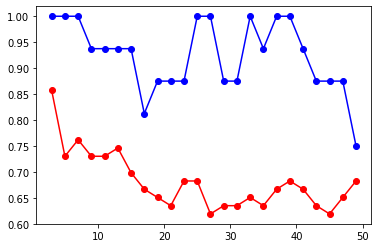

In [ ]:
plt.plot(np.arange(3, 50, 2),[i[0]for i in acc], 'ro-')
plt.plot(np.arange(3, 50, 2),[i[1]for i in acc], 'bo-')
plt.show()

In [ ]:
model =  KNeighborsClassifier(n_neighbors = 3)
#fitting the model
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#predicting from the model
y_pred = model.predict(x_test)

In [ ]:
#getting the accuracy
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 1.0


In [ ]:
#try to get cross validation accuracy for k=3

In [ ]:
#bagging classfier

In [ ]:
#creating the model
#intialization
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = model,
                         n_estimators = 100,
                         bootstrap = True,
                         n_jobs = -1,
                         random_state = 7)

#fitting the model
model.fit(x_train, y_train)


BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=100, n_jobs=-1, random_state=7)

In [ ]:
#try decision tree classifier on the data and comment the about the results

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

#Gini

 the Gini index or Gini ratio, is a measure of statistical dispersion intended to represent the income inequality 

In [ ]:
# fit the model
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#Predict the Test set results with criterion gini index
y_pred_gini = model_gini.predict(x_test)

In [ ]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8125


In [ ]:
#Compare the train-set and test-set accuracy
y_pred_gini = model_gini.predict(x_test)

In [ ]:
y_pred_train_gini = model_gini.predict(x_train)



In [ ]:
#accuracy of the training dataset
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8095
